In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

In [2]:
df = pd.read_csv('Debernardi et al 2020 data.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,ï»¿sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
df

,ï»¿sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [5]:
df.dtypes

ï»¿sample_id                object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [6]:
df.isnull().sum()

ï»¿sample_id                 0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [7]:
df_cleaned = df.drop(columns=['ï»¿sample_id', 'stage', 'benign_sample_diagnosis'])

In [8]:
df_cleaned['sex'] = df_cleaned['sex'].map({'M': 1, 'F': 0})

In [9]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['patient_cohort', 'sample_origin'], drop_first=True)

In [10]:
df_cleaned.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_Cohort2,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL
0,33,0,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000,False,False,False,False
1,81,0,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407,False,False,False,False
2,51,1,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN,True,False,False,False
3,61,1,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN,True,False,False,False
4,62,1,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN,True,False,False,False


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     590 non-null    int64  
 1   sex                     590 non-null    int64  
 2   diagnosis               590 non-null    int64  
 3   plasma_CA19_9           350 non-null    float64
 4   creatinine              590 non-null    float64
 5   LYVE1                   590 non-null    float64
 6   REG1B                   590 non-null    float64
 7   TFF1                    590 non-null    float64
 8   REG1A                   306 non-null    float64
 9   patient_cohort_Cohort2  590 non-null    bool   
 10  sample_origin_ESP       590 non-null    bool   
 11  sample_origin_LIV       590 non-null    bool   
 12  sample_origin_UCL       590 non-null    bool   
dtypes: bool(4), float64(6), int64(3)
memory usage: 43.9 KB


In [13]:
df_cleaned.isnull().sum()

age                         0
sex                         0
diagnosis                   0
plasma_CA19_9             240
creatinine                  0
LYVE1                       0
REG1B                       0
TFF1                        0
REG1A                     284
patient_cohort_Cohort2      0
sample_origin_ESP           0
sample_origin_LIV           0
sample_origin_UCL           0
dtype: int64

In [15]:
df_cleaned['patient_cohort_Cohort2'].unique()

array([False,  True])

In [17]:
df_cleaned['sample_origin_ESP'].unique()

array([False,  True])

In [19]:
df_cleaned['sample_origin_LIV'].unique()

array([False,  True])

In [20]:
df_cleaned['sample_origin_UCL'].unique()

array([False,  True])

In [21]:
df_cleaned['age'].unique()

array([33, 81, 51, 61, 62, 53, 70, 58, 59, 56, 77, 71, 49, 60, 69, 55, 28,
       54, 50, 40, 74, 63, 47, 45, 35, 30, 48, 44, 41, 89, 87, 66, 36, 67,
       73, 83, 65, 64, 26, 34, 57, 46, 38, 84, 68, 37, 52, 78, 43, 76, 72,
       32, 39, 29, 82, 31, 75, 79, 42, 80, 88, 86, 85], dtype=int64)

In [22]:
df_cleaned['sex'].unique()

array([0, 1], dtype=int64)

In [23]:
df_cleaned['plasma_CA19_9'].unique()

array([1.1700000e+01,           nan, 7.0000000e+00, 8.0000000e+00,
       9.0000000e+00, 1.1000000e+01, 2.4000000e+01, 2.3000000e+01,
       1.2000000e+01, 2.8000000e+01, 4.7000000e+01, 1.7000000e+01,
       8.7000000e+00, 9.6000000e+00, 4.0000000e+00, 1.0800000e+01,
       5.6475920e-02, 4.0602580e+00, 9.0857800e-01, 3.3893040e+00,
       5.1282340e+00, 1.1359264e+00, 1.9389494e+00, 2.0590780e+00,
       5.1610920e-01, 1.8477128e+00, 2.1163800e+00, 2.5580040e+00,
       6.2750960e+00, 2.3708060e+00, 5.5172020e+00, 1.1303358e+00,
       6.2230820e+00, 9.1603200e-01, 7.4990400e-01, 1.0800212e+00,
       1.9369218e+00, 2.5244100e+00, 2.5321640e+00, 4.5713380e-01,
       3.5273440e+00, 8.1353880e-01, 5.1564960e-02, 8.3031040e-01,
       7.1409760e-01, 6.1590640e+00, 0.0000000e+00, 5.1400280e-01,
       2.5385020e+01, 1.9835538e+00, 7.3094760e-01, 6.4880360e-01,
       5.0252720e+00, 1.2861902e+00, 3.9514600e+00, 8.0235780e-01,
       5.1519940e+00, 1.1787872e+00, 1.3996204e-01, 1.2029986e

In [24]:
df_cleaned['plasma_CA19_9']=df_cleaned['plasma_CA19_9'].fillna(df_cleaned['plasma_CA19_9'].mean())

In [25]:
df_cleaned['REG1A'].unique()

array([1.262000e+03, 2.284070e+02,          nan, 5.055710e+02,
       3.810000e+02, 1.130000e+02, 1.370000e+02, 1.115310e+02,
       9.030000e+02, 1.490000e+02, 7.360000e+02, 5.630000e+02,
       6.240000e+02, 5.700000e+02, 1.169980e+02, 1.031840e+02,
       1.082980e+02, 3.587940e+02, 6.756230e+02, 1.760000e+02,
       8.677500e+01, 6.477900e+01, 1.326040e+02, 8.382900e+01,
       5.075930e+02, 2.603990e+02, 4.233600e+01, 0.000000e+00,
       1.361600e+01, 3.532470e+02, 4.933940e+02, 6.591200e+01,
       6.482100e+01, 8.161000e+01, 2.718400e+01, 1.461200e+01,
       2.382620e+02, 1.005800e+02, 2.934500e+01, 2.175880e+02,
       2.120400e+01, 2.734900e+01, 3.109480e+02, 8.412300e+01,
       2.246560e+02, 1.689800e+01, 4.091980e+02, 2.929260e+02,
       9.272700e+01, 4.088700e+01, 4.546000e+01, 1.451980e+02,
       1.731620e+02, 8.177320e+02, 2.782880e+02, 5.547900e+01,
       3.453230e+02, 8.038600e+01, 3.410500e+01, 7.602400e+01,
       5.952800e+01, 8.036700e+01, 3.486900e+01, 8.2775

In [26]:
df_cleaned['REG1A']=df_cleaned['REG1A'].fillna(df_cleaned['REG1A'].mean())

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     590 non-null    int64  
 1   sex                     590 non-null    int64  
 2   diagnosis               590 non-null    int64  
 3   plasma_CA19_9           590 non-null    float64
 4   creatinine              590 non-null    float64
 5   LYVE1                   590 non-null    float64
 6   REG1B                   590 non-null    float64
 7   TFF1                    590 non-null    float64
 8   REG1A                   590 non-null    float64
 9   patient_cohort_Cohort2  590 non-null    bool   
 10  sample_origin_ESP       590 non-null    bool   
 11  sample_origin_LIV       590 non-null    bool   
 12  sample_origin_UCL       590 non-null    bool   
dtypes: bool(4), float64(6), int64(3)
memory usage: 43.9 KB


In [28]:
df_cleaned.dtypes

age                         int64
sex                         int64
diagnosis                   int64
plasma_CA19_9             float64
creatinine                float64
LYVE1                     float64
REG1B                     float64
TFF1                      float64
REG1A                     float64
patient_cohort_Cohort2       bool
sample_origin_ESP            bool
sample_origin_LIV            bool
sample_origin_UCL            bool
dtype: object

In [30]:
print(df_cleaned.shape)
print(df_cleaned.info())
print(df_cleaned.describe())
print(df_cleaned['diagnosis'].value_counts())


(590, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     590 non-null    int64  
 1   sex                     590 non-null    int64  
 2   diagnosis               590 non-null    int64  
 3   plasma_CA19_9           590 non-null    float64
 4   creatinine              590 non-null    float64
 5   LYVE1                   590 non-null    float64
 6   REG1B                   590 non-null    float64
 7   TFF1                    590 non-null    float64
 8   REG1A                   590 non-null    float64
 9   patient_cohort_Cohort2  590 non-null    bool   
 10  sample_origin_ESP       590 non-null    bool   
 11  sample_origin_LIV       590 non-null    bool   
 12  sample_origin_UCL       590 non-null    bool   
dtypes: bool(4), float64(6), int64(3)
memory usage: 43.9 KB
None
              age        

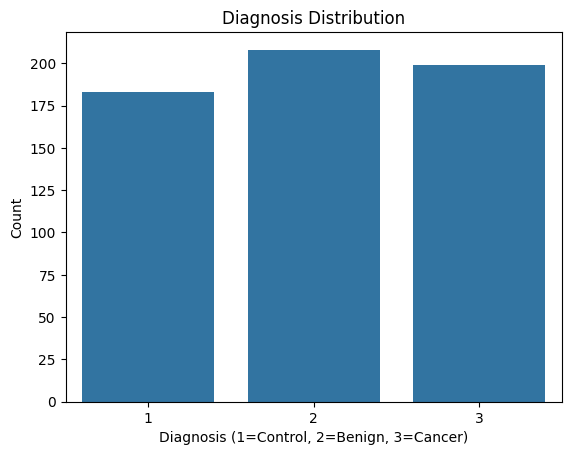

In [31]:
sns.countplot(data=df_cleaned, x='diagnosis')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (1=Control, 2=Benign, 3=Cancer)')
plt.ylabel('Count')
plt.show()

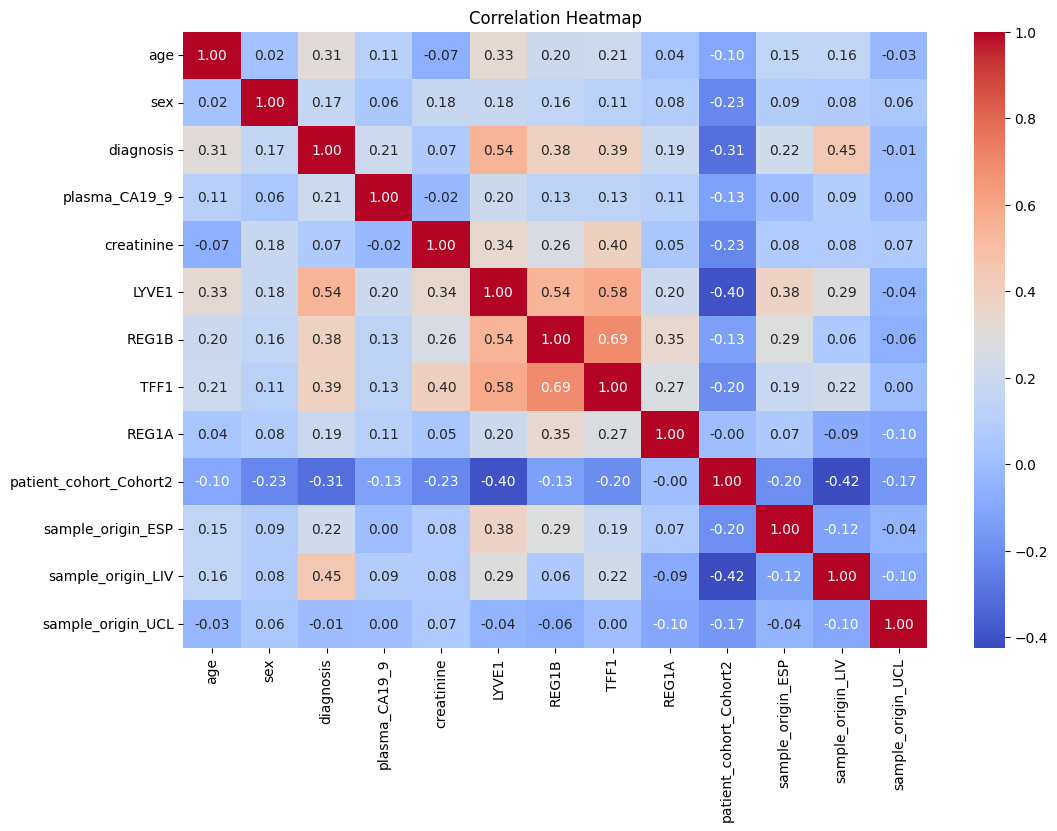

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

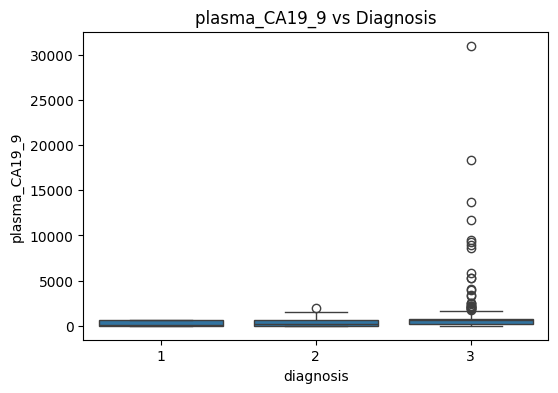

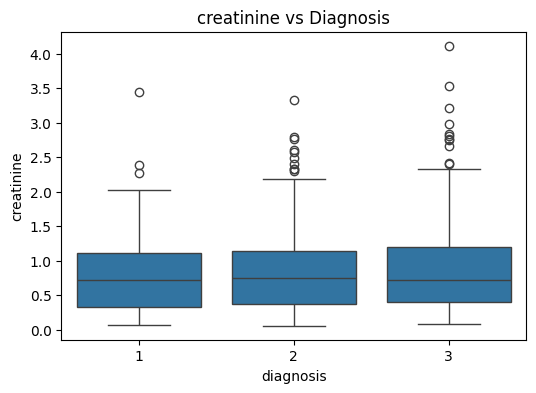

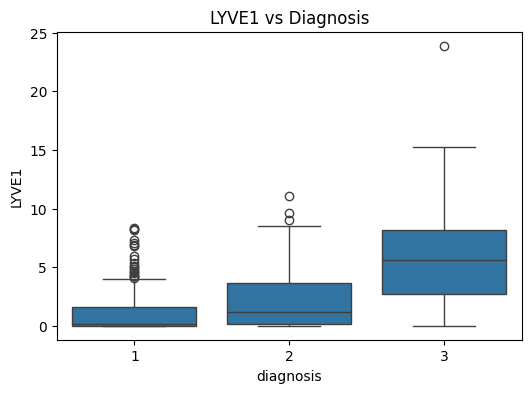

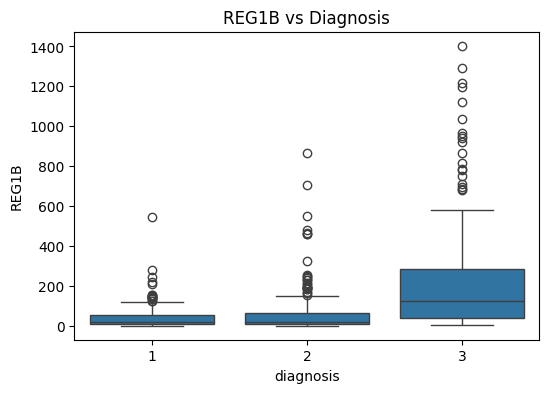

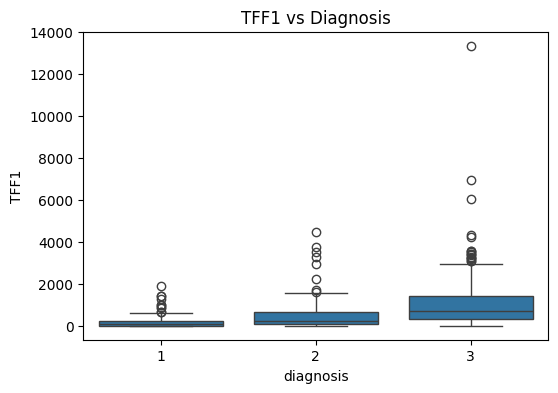

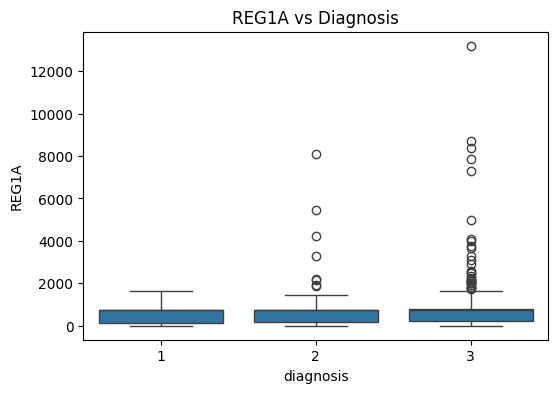

In [33]:
biomarkers = ["plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]

for biomarker in biomarkers:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=biomarker, data=df_cleaned)
    plt.title(f'{biomarker} vs Diagnosis')
    plt.show()


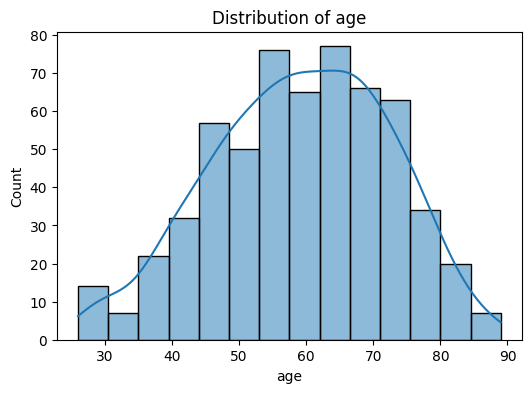

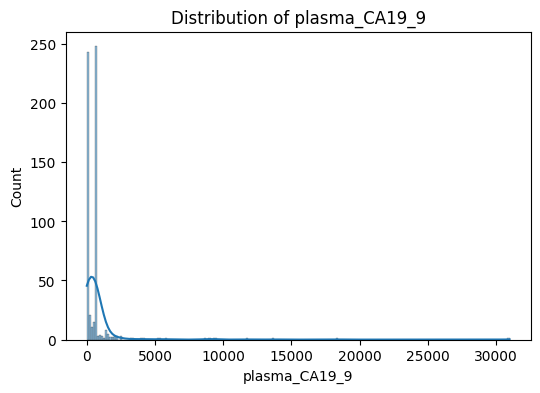

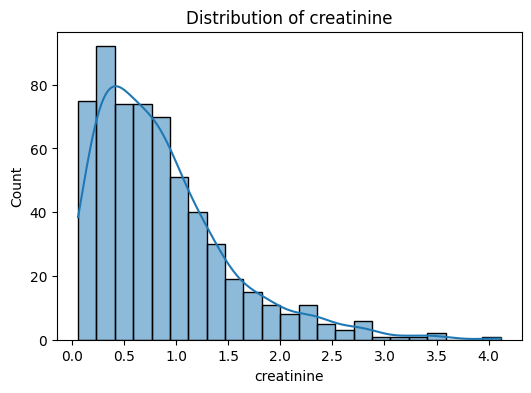

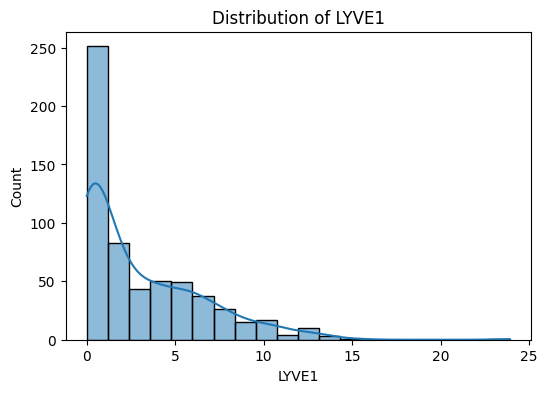

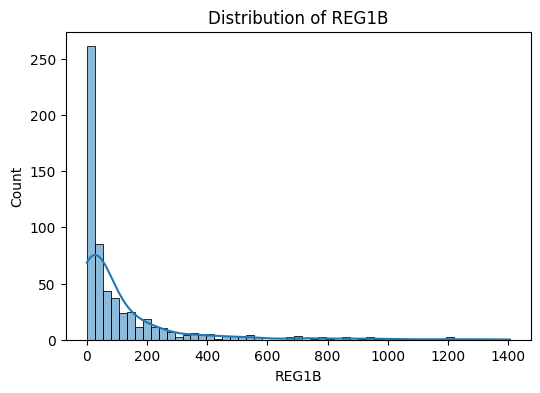

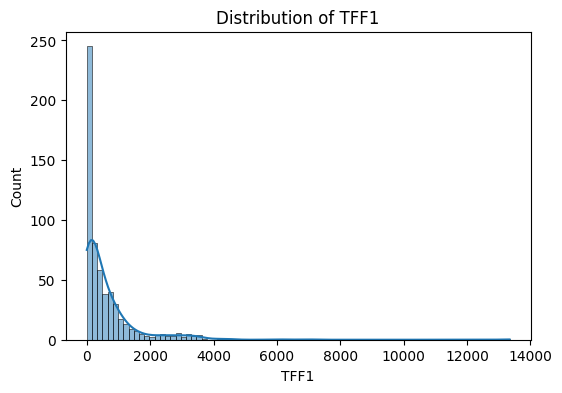

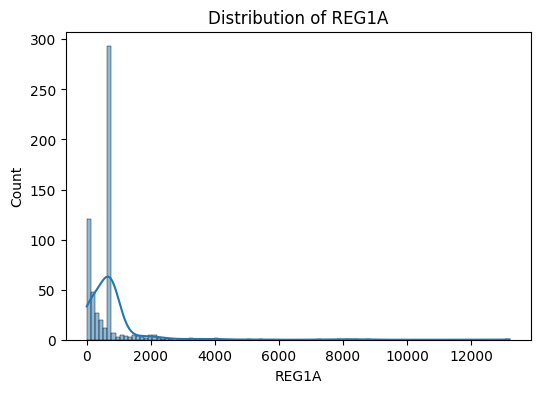

In [35]:
for feature in ['age'] + biomarkers:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


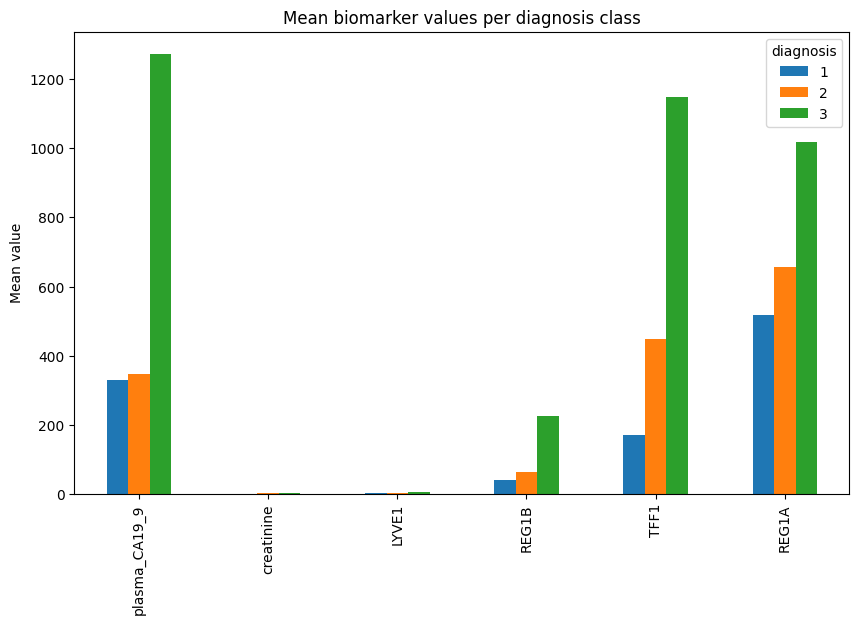

In [36]:
df_cleaned.groupby("diagnosis")[biomarkers].mean().T.plot(kind="bar", figsize=(10, 6))
plt.title("Mean biomarker values per diagnosis class")
plt.ylabel("Mean value")
plt.show()


In [37]:
df_cleaned.to_csv('clear_data.csv', encoding='utf-8')

In [38]:
df_cleaned.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_Cohort2,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL
0,33,0,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,False,False,False,False
1,81,0,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000,False,False,False,False
2,51,1,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222,True,False,False,False
3,61,1,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222,True,False,False,False
4,62,1,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222,True,False,False,False


In [39]:
# MODEL SELECTION AND DEVELOPMENT

In [40]:
X = df_cleaned.drop(['diagnosis'], axis=1).values
y = df_cleaned['diagnosis'].values

In [ ]:
X.shape

(590, 12)

In [42]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [44]:
X

array([[33, 0, 11.7, ..., False, False, False],
       [81, 0, 654.0029437763428, ..., False, False, False],
       [51, 1, 7.0, ..., False, False, False],
       ...,
       [63, 1, 654.0029437763428, ..., False, False, False],
       [75, 0, 654.0029437763428, ..., False, False, False],
       [74, 1, 1488.0, ..., False, False, False]], dtype=object)

In [45]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (590, 12)
y shape: (590,)


In [46]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
x_data,y_data=ro.fit_resample(X,y)

In [47]:
from collections import Counter
print("Actual Data:",Counter(y))

Actual Data: Counter({2: 208, 3: 199, 1: 183})


In [48]:
print("Artificial Data:",Counter(y_data))

Artificial Data: Counter({1: 208, 2: 208, 3: 208})


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (472, 12)
Test set size: (118, 12)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [59]:
rfc = RandomForestClassifier(n_estimators=60, random_state=42)

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

In [61]:
rfc.score(X_train,y_train)

1.0

In [62]:
y_pred = rfc.predict(X_test)

In [63]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7711864406779662
              precision    recall  f1-score   support

           1       0.79      0.70      0.74        37
           2       0.73      0.66      0.69        41
           3       0.79      0.95      0.86        40

    accuracy                           0.77       118
   macro avg       0.77      0.77      0.77       118
weighted avg       0.77      0.77      0.77       118



In [64]:
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
cm

array([[26,  8,  3],
       [ 7, 27,  7],
       [ 0,  2, 38]], dtype=int64)

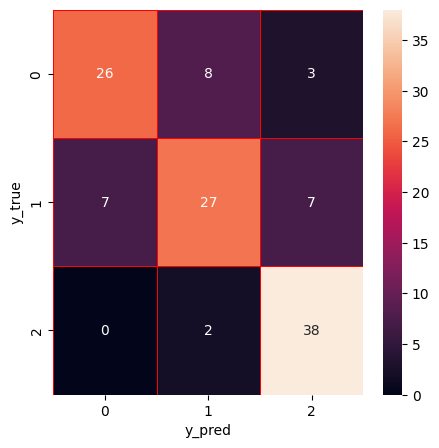

In [65]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [66]:
# Random Forest + Hyperparameter tuning

In [67]:
param_dist = {
    'n_estimators': [50, 60, 70, 80, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [68]:

from sklearn.model_selection import RandomizedSearchCV
rfc_model = RandomForestClassifier(random_state=23)
random_search = RandomizedSearchCV(rfc_model, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 60, 70, 80, 100]},
                   random_state=42)

In [69]:
best_rfc = random_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Accuracy: 0.7542372881355932
              precision    recall  f1-score   support

           1       0.79      0.73      0.76        37
           2       0.72      0.63      0.68        41
           3       0.75      0.90      0.82        40

    accuracy                           0.75       118
   macro avg       0.76      0.75      0.75       118
weighted avg       0.75      0.75      0.75       118



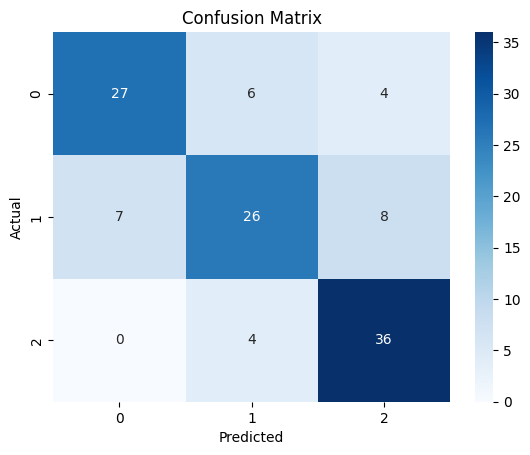

In [70]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

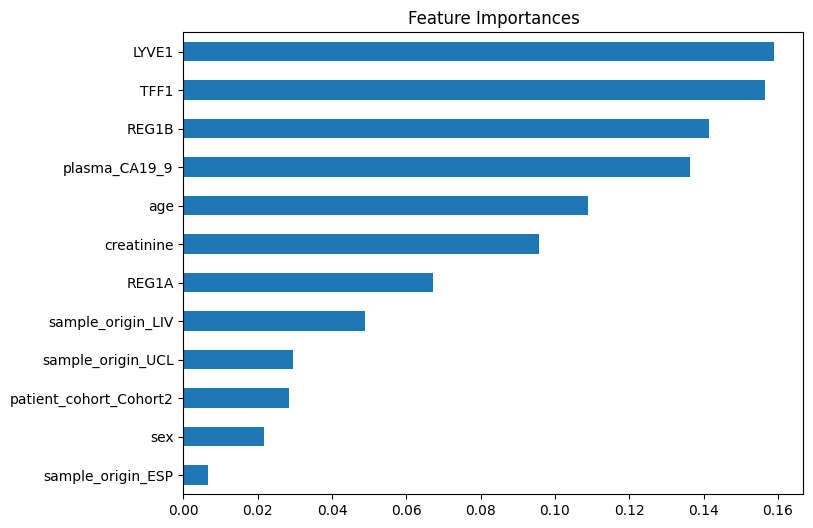

In [71]:
importances = pd.Series(best_rfc.feature_importances_, index=df_cleaned.drop(['diagnosis'], axis=1).columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), title='Feature Importances')
plt.show()

In [72]:
import joblib

In [98]:
joblib.dump(best_rfc, 'random_forest_pancreatic_model.pkl')
random = joblib.load('random_forest_pancreatic_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [74]:
#NAIVE BAYES

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [77]:
gnb.fit(X_train, y_train)

GaussianNB()

In [78]:
gnb.score(X_train, y_train)

0.5995762711864406

In [79]:
from sklearn.metrics import accuracy_score
y_pred = gnb.predict(X_test)
accuracy_score(y_pred,y_test) 

0.5677966101694916

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.97      0.66        37
           2       0.47      0.22      0.30        41
           3       0.81      0.55      0.66        40

    accuracy                           0.57       118
   macro avg       0.60      0.58      0.54       118
weighted avg       0.60      0.57      0.53       118



In [82]:
y_pred = gnb.predict(X_test)
y_true=y_test

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[36,  0,  1],
       [28,  9,  4],
       [ 8, 10, 22]], dtype=int64)

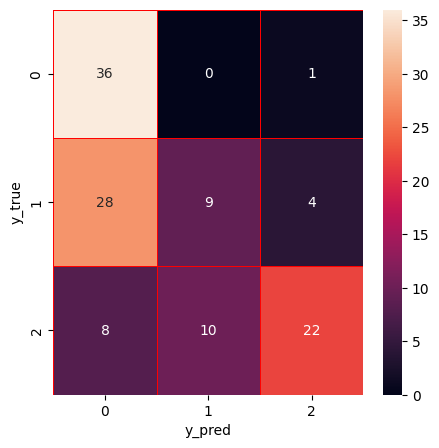

In [84]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [85]:
import pickle

pickle.dump(gnb,open('pancreatic_naive.pkl','wb'))
naive = pickle.load(open('pancreatic_naive.pkl','rb'))

In [86]:
from sklearn.svm import SVC

In [87]:
svm_linear = SVC(kernel='linear',random_state=42)

In [89]:
svm_linear.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [91]:
y_pred_svm = svm_linear.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred_svm)

0.7542372881355932

In [93]:
confusion_matrix(y_true,y_pred_svm)

array([[34,  2,  1],
       [15, 20,  6],
       [ 4,  1, 35]], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.64      0.92      0.76        37
           2       0.87      0.49      0.62        41
           3       0.83      0.88      0.85        40

    accuracy                           0.75       118
   macro avg       0.78      0.76      0.74       118
weighted avg       0.79      0.75      0.74       118



In [95]:
cm=confusion_matrix(y_true,y_pred_svm)
cm

array([[34,  2,  1],
       [15, 20,  6],
       [ 4,  1, 35]], dtype=int64)

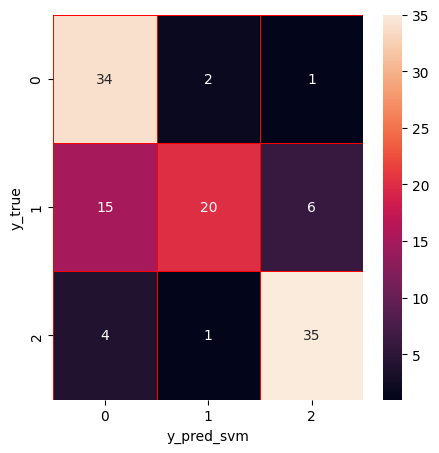

In [96]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_svm")
plt.ylabel("y_true")
plt.show()

In [97]:
pickle.dump(svm_linear,open("pancreatic_svm.pkl","wb"))
svm = pickle.load(open("pancreatic_svm.pkl","rb"))